## Section 2 - Interesting Behavior
Aug 29, 2016

In [1]:
library(dplyr)
library(ggplot2)
library(repr)
library(tidyr)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
load('IndigoData.dat')
data$event_press <- as.character(data$event_press)
data_ps <- data %>% filter(event_state == "PRINT_STATE")

In [3]:
options(repr.plot.width=10, repr.plot.height = 3)

aggregate_unique <- function(x) {
  u <- x %>% na.omit() %>% unique()
  paste0(u, collapse = " -> ")
}
data_ps_filtered <- data_ps %>% filter(event_press == "43000317"  | event_press == "43000246" | event_press == "45000161")

data_ps_swv <- data_ps_filtered %>% group_by(event_press) %>%
               summarize(SWv.Transitions = aggregate_unique(SWv))

data_ps_filtered %>% 
            group_by(event_press,
                     Product_Line,
                     Region,
                     SubRegion) %>% nest() %>% select(-data) %>% arrange(event_press) %>%
            inner_join(data_ps_swv, by = "event_press")


graph_data_43000317 <- data_ps_filtered %>% filter(event_press == "43000317")
graph_data_43000246 <- data_ps_filtered %>% filter(event_press == "43000246")
graph_data_45000161 <- data_ps_filtered %>% filter(event_press == "45000161")

,event_press,Product_Line,Region,SubRegion,SWv.Transitions
1,43000246,HP Indigo 7500,North America,Western United States,V8_6_3_i35 I-Fix 1_i4 -> V11_4_i40 I-Fix 1_i11
2,43000317,HP Indigo 7500,"Europe, Middle East & Africa",Iberia,V11_4_i40
3,45000161,HP Indigo 7600,"Europe, Middle East & Africa",Italy,V11_4_i40 -> V11_4_i40 I-Fix 1_i11


In [4]:
upgrade <- data_ps_filtered %>% filter(SWv == "V11_4_i40 I-Fix 1_i11") %>% 
                     select(event_press, full_time) %>% 
                     group_by(event_press) %>%
                     summarise(first.occurrence = min(full_time))

#Dates of upgrades done
upgrade_43000246 <- upgrade[upgrade$event_press == "43000246",2][[1]] %>% as.numeric()
upgrade_45000161 <- upgrade[upgrade$event_press == "45000161",2][[1]] %>% as.numeric()
#43000317 does not upgrade during the period

### PIP Temperature Comparison

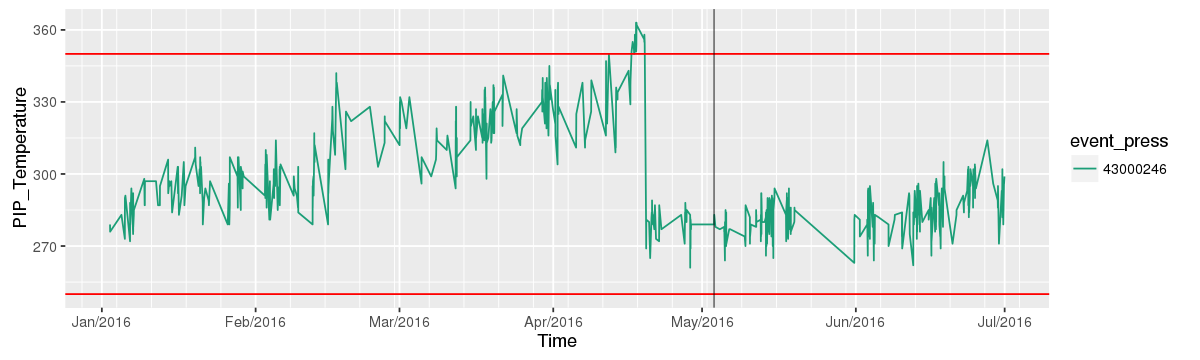

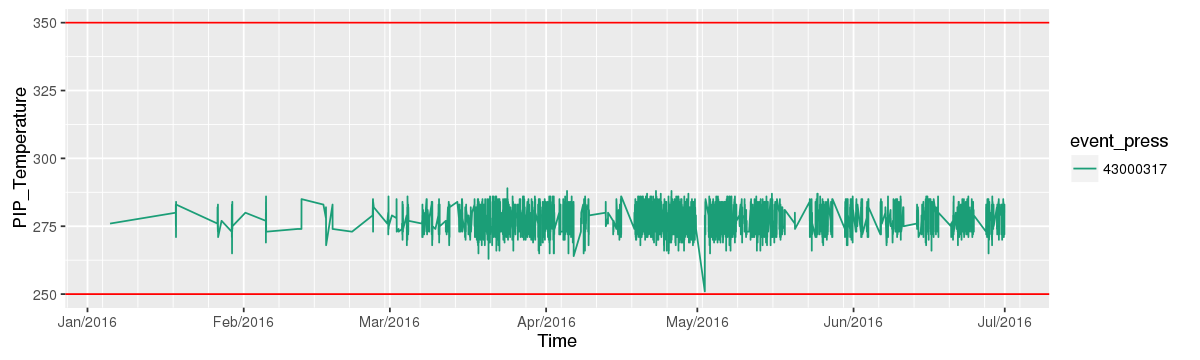

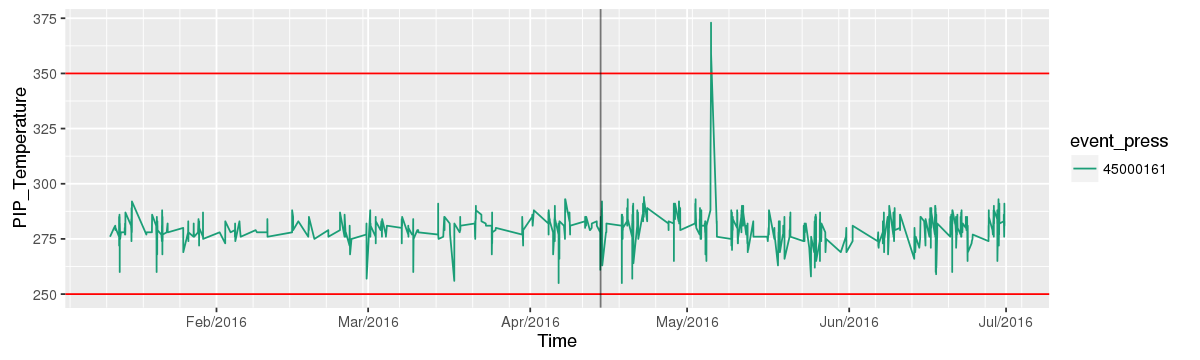

In [5]:
graph_data_43000246 %>% ggplot(aes(x=full_time, y=PIP_Temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  geom_vline(xintercept = upgrade_43000246, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_43000317 %>% ggplot(aes(x=full_time, y=PIP_Temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_45000161 %>% ggplot(aes(x=full_time, y=PIP_Temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  geom_vline(xintercept = upgrade_45000161, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

### IO Temperature Comparison

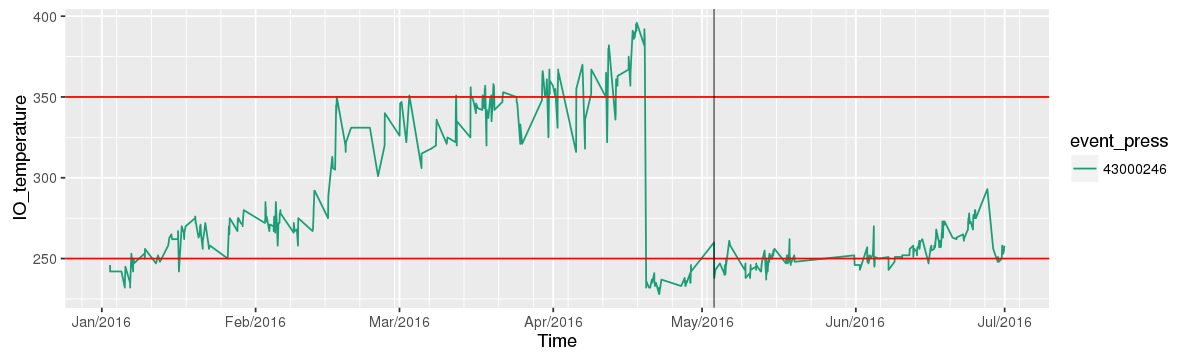

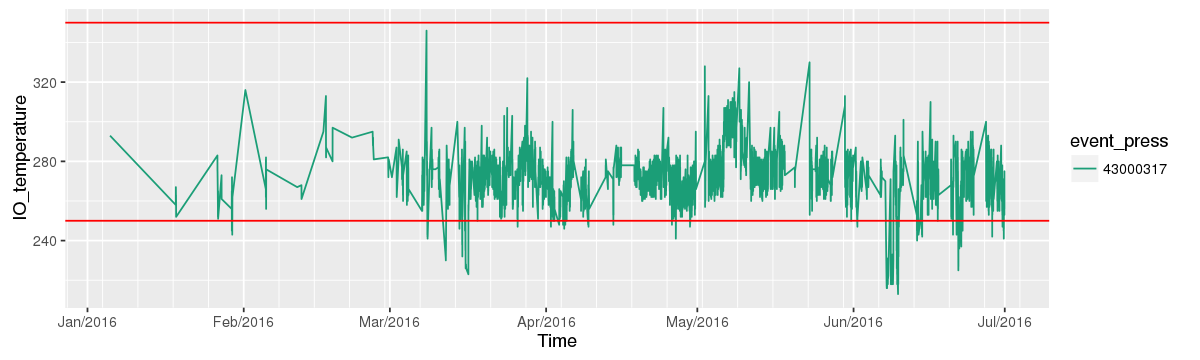

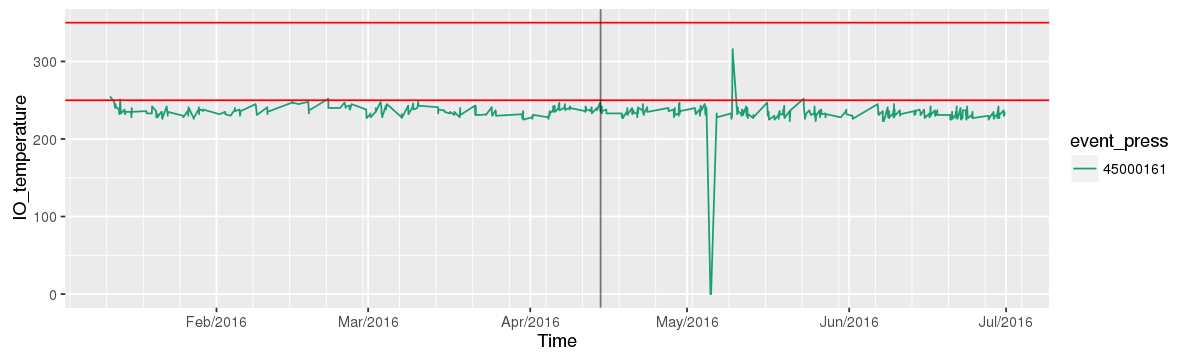

In [6]:
graph_data_43000246 %>% ggplot(aes(x=full_time, y=IO_temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  geom_vline(xintercept = upgrade_43000246, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_43000317 %>% ggplot(aes(x=full_time, y=IO_temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_45000161 %>% ggplot(aes(x=full_time, y=IO_temperature, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 350, col = "red") + #Upper nominal limit 35ºC
  geom_hline(yintercept = 250, col = "red") + #Lower nominal limit 25ºC
  geom_vline(xintercept = upgrade_45000161, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

### CS Voltage Comparison

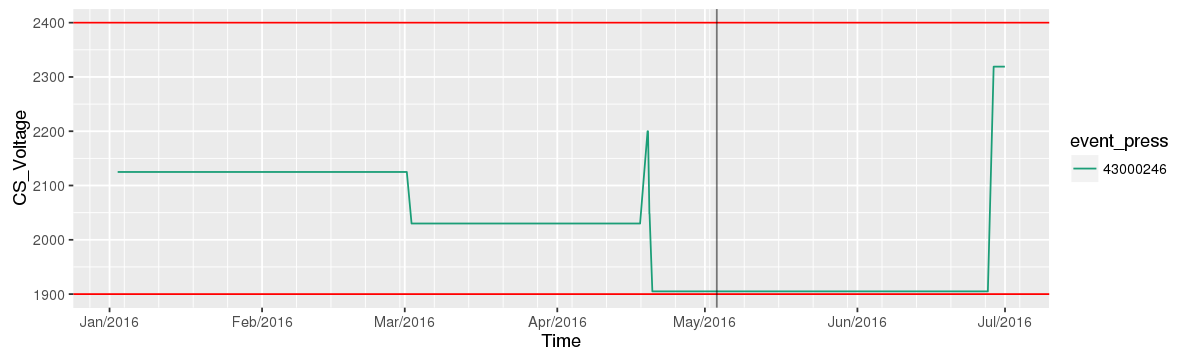

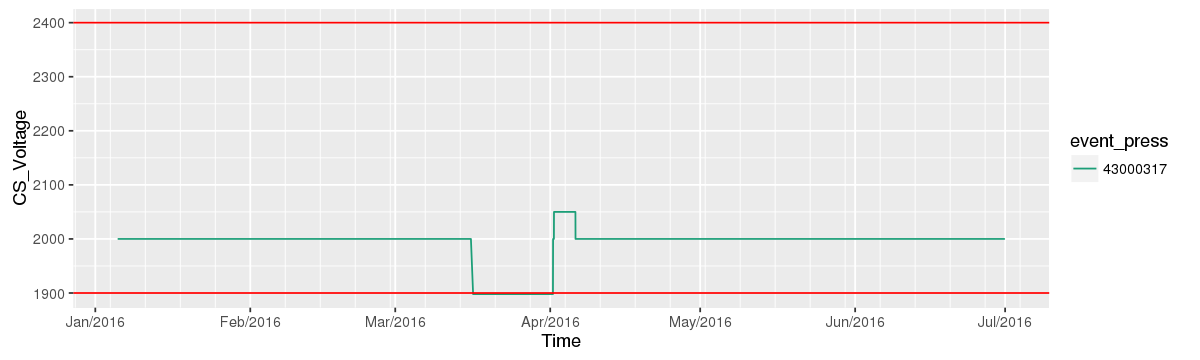

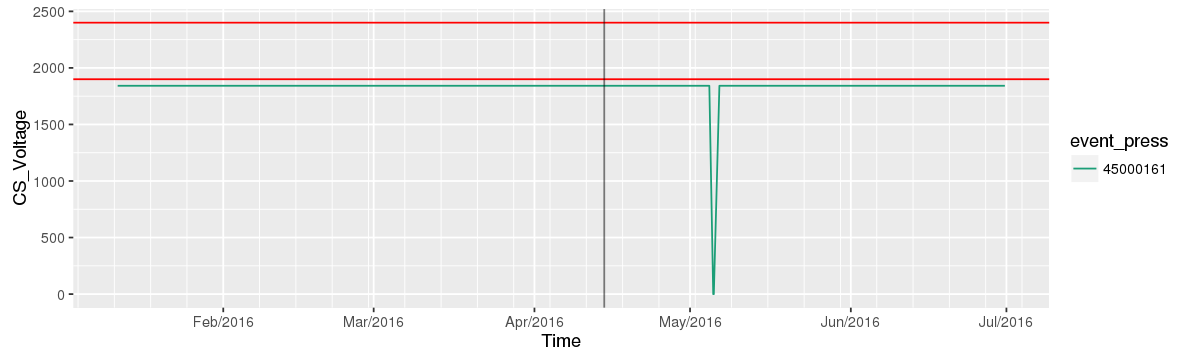

In [7]:
graph_data_43000246 %>% ggplot(aes(x=full_time, y=CS_Voltage, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 2400, col = "red") + #Upper nominal limit 24V
  geom_hline(yintercept = 1900, col = "red") + #Lower nominal limit 18V
  geom_vline(xintercept = upgrade_43000246, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_43000317 %>% ggplot(aes(x=full_time, y=CS_Voltage, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 2400, col = "red") + #Upper nominal limit 24V
  geom_hline(yintercept = 1900, col = "red") + #Lower nominal limit 18V
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_45000161 %>% ggplot(aes(x=full_time, y=CS_Voltage, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 2400, col = "red") + #Upper nominal limit 24V
  geom_hline(yintercept = 1900, col = "red") + #Lower nominal limit 18V
  geom_vline(xintercept = upgrade_45000161, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

### Vessel Flow Comparison

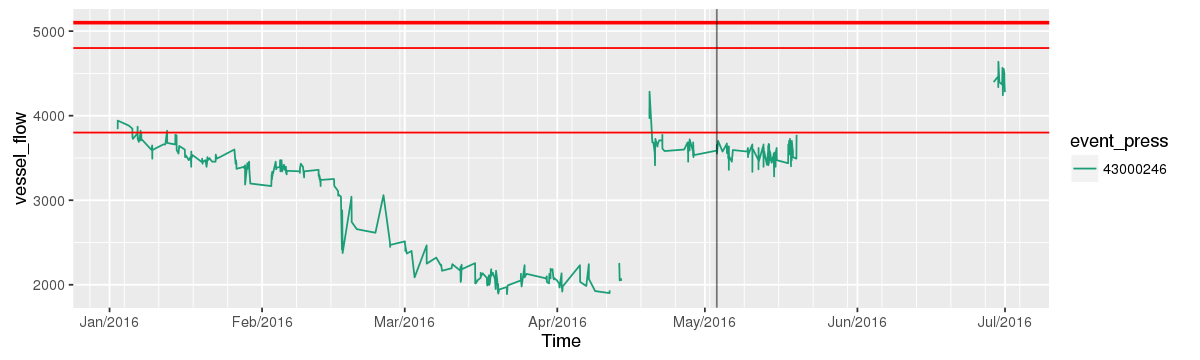

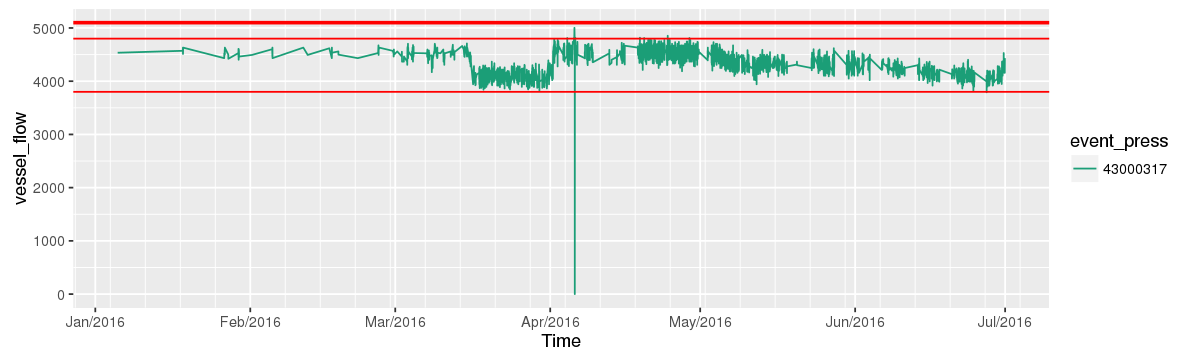

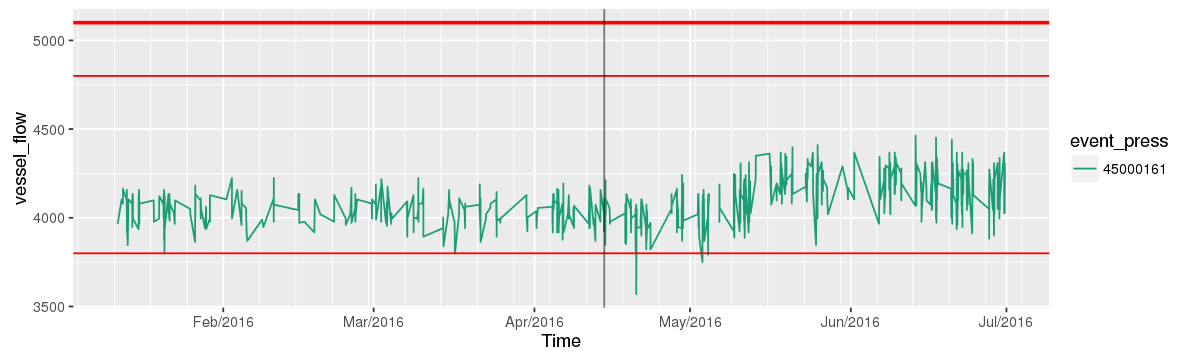

In [8]:
graph_data_43000246 %>% ggplot(aes(x=full_time, y=vessel_flow, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 5100, col = "red", size = 1) + #Extreme Upper limit
  geom_hline(yintercept = 4800, col = "red") + #Upper nominal limit 4800
  geom_hline(yintercept = 3800, col = "red") + #Lower nominal limit 3800
  geom_vline(xintercept = upgrade_43000246, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_43000317 %>% ggplot(aes(x=full_time, y=vessel_flow, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 5100, col = "red", size = 1) + #Extreme Upper limit
  geom_hline(yintercept = 4800, col = "red") + #Upper nominal limit 4800
  geom_hline(yintercept = 3800, col = "red") + #Lower nominal limit 3800
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_45000161 %>% ggplot(aes(x=full_time, y=vessel_flow, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_hline(yintercept = 5100, col = "red", size = 1) + #Extreme Upper limit
  geom_hline(yintercept = 4800, col = "red") + #Upper nominal limit 4800
  geom_hline(yintercept = 3800, col = "red") + #Lower nominal limit 3800
  geom_vline(xintercept = upgrade_45000161, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

### IO Dirtiness Comparison


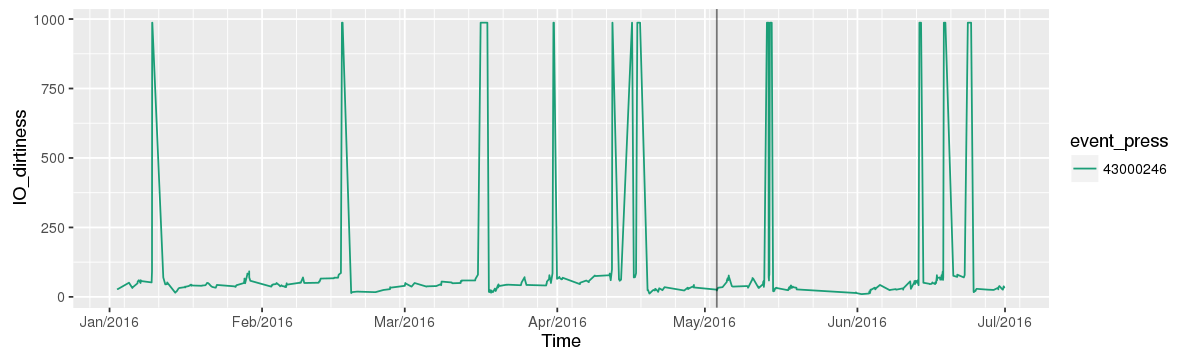

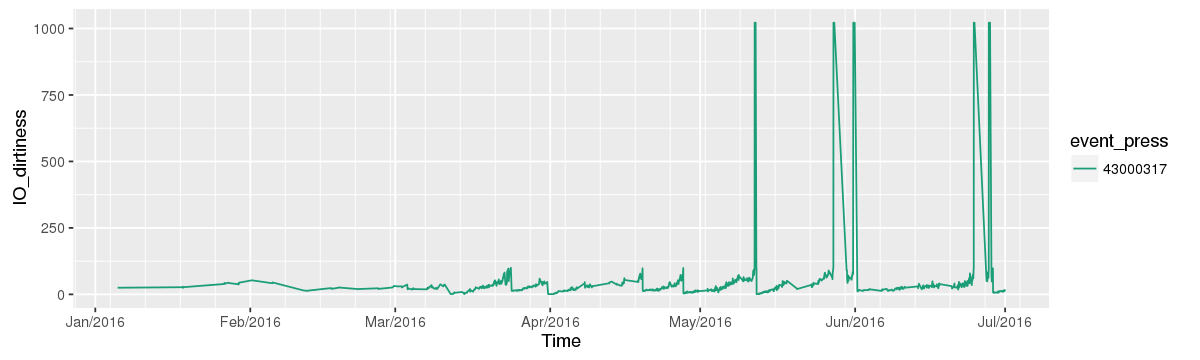

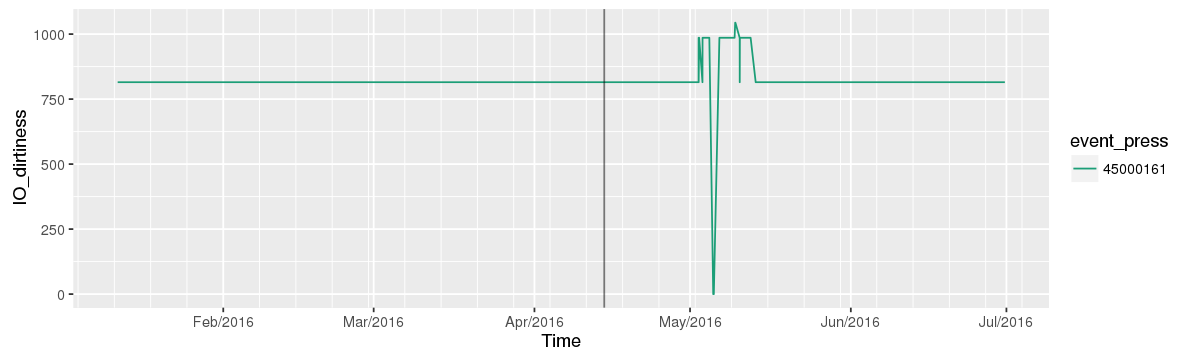

In [9]:
graph_data_43000246 %>% ggplot(aes(x=full_time, y=IO_dirtiness, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_vline(xintercept = upgrade_43000246, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_43000317 %>% ggplot(aes(x=full_time, y=IO_dirtiness, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")

graph_data_45000161 %>% ggplot(aes(x=full_time, y=IO_dirtiness, col = event_press)) +
  scale_colour_brewer(palette = "Dark2") +
  geom_line() +
  geom_vline(xintercept = upgrade_45000161, col = "black", alpha = 0.5) +
  scale_x_datetime(date_breaks = "1 month", date_labels = "%b/%Y", date_minor_breaks = "1 week") +
  xlab("Time")